# Machine Learning - HW1 - Part 6

In [1]:
import numpy as np
from PIL import Image, ImageStat
from matplotlib import pyplot as plt
import os

### Faunction Definitions

In [2]:
def draw_confusion_matrix(matrix):
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.imshow(matrix, cmap='YlGn')

    ax.set_xticks(np.arange(2), labels=range(2))
    ax.set_yticks(np.arange(2), labels=range(2))

    ax.set_xlabel("prediction")
    ax.set_ylabel("label")

    colors = [['w', 'k'], ['k', 'w']]
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, matrix[i][j], ha="center", va="center", color=colors[i][j])

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.savefig('tmp.png', dpi = 150)
    plt.show()

### Loading Dataset

In [3]:
imgs = []
mean_colors = []

data_path = os.path.join('Data', 'Images')

for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    img = Image.open(file_path)
    imgs.append(img)
    mean_colors.append(ImageStat.Stat(img).mean)

### classifying Chelsea as 1 and Manchester United as 0

The first 64 images belong to Chelsea and the second 64 images belong to Manchester United

In [4]:
y = [1 if i < 64 else 0 for i in range(len(imgs))]

In [5]:
def classifier(mean_color):
    if mean_color[0] < mean_color[2]:
        return 1

    return 0

In [6]:
yp = [classifier(mean_colors[i]) for i in range(len(imgs))]

yp = np.array(yp)
y = np.array(y)

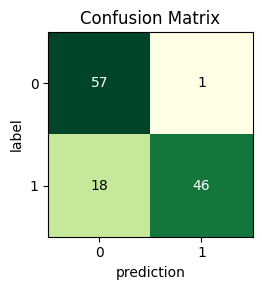

In [7]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y, yp)
draw_confusion_matrix(confusion_matrix)

In [8]:
print("accuracy: {:.1f}%".format(metrics.accuracy_score(y, yp)*100), end='\n\n')
print('-- Chelsea')
print("recall: {:.1f}%".format(metrics.recall_score(y, yp)*100))
print("precision: {:.1f}%".format(metrics.precision_score(y, yp)*100), end='\n\n')
print('-- Manchester United')
print("recall: {:.1f}%".format(metrics.recall_score(1-y, 1-yp)*100))
print("precision: {:.1f}%".format(metrics.precision_score(1-y, 1-yp)*100))

accuracy: 84.4%

-- Chelsea
recall: 71.9%
precision: 97.9%

-- Manchester United
recall: 98.3%
precision: 76.0%


## Naive Bayes Classifier

training a naive bayes classifier with red and blue mean color input

In [9]:
x = np.array([[mean_colors[i][0], mean_colors[i][2]] for i in range(len(imgs))])

### classifying Chelsea as 1 and Manchester United as 0

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb = gnb.fit(x, y)
y_pred = gnb.predict(x)

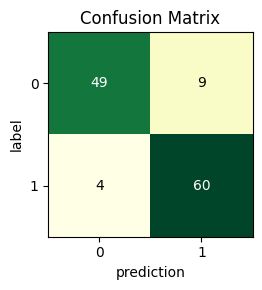

In [11]:
draw_confusion_matrix(metrics.confusion_matrix(y, y_pred))

In [12]:
print("accuracy: {:.1f}%".format(metrics.accuracy_score(y, y_pred)*100), end='\n\n')
print('-- Chelsea')
print("recall: {:.1f}%".format(metrics.recall_score(y, y_pred)*100))
print("precision: {:.1f}%".format(metrics.precision_score(y, y_pred)*100), end='\n\n')
print('-- Manchester United')
print("recall: {:.1f}%".format(metrics.recall_score(1-y, 1-y_pred)*100))
print("precision: {:.1f}%".format(metrics.precision_score(1-y, 1-y_pred)*100))

accuracy: 89.3%

-- Chelsea
recall: 93.8%
precision: 87.0%

-- Manchester United
recall: 84.5%
precision: 92.5%


### Separate Test & Train Data

this time we will split the data into test and train sets, in order to test the efficiency of the naive bayes classifier on this problem

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
gnb2 = GaussianNB()

gnb2 = gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

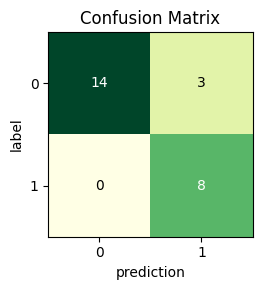

In [15]:
draw_confusion_matrix(metrics.confusion_matrix(y_test, y_pred))

In [16]:
print("accuracy: {:.1f}%".format(metrics.accuracy_score(y_test, y_pred)*100), end='\n\n')
print('-- Chelsea')
print("recall: {:.1f}%".format(metrics.recall_score(y_test, y_pred)*100))
print("precision: {:.1f}%".format(metrics.precision_score(y_test, y_pred)*100), end='\n\n')
print('-- Manchester United')
print("recall: {:.1f}%".format(metrics.recall_score(1-y_test, 1-y_pred)*100))
print("precision: {:.1f}%".format(metrics.precision_score(1-y_test, 1-y_pred)*100))

accuracy: 88.0%

-- Chelsea
recall: 100.0%
precision: 72.7%

-- Manchester United
recall: 82.4%
precision: 100.0%
